In [48]:
%matplotlib inline

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.mixture import GaussianMixture as gm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import multivariate_normal as mvn
from scipy.spatial.distance import cdist

import pandas as pd

In [49]:
path = '/Users/emmadionne/Documents/'
file = 'test_angs_mags_metrics.csv'
tsv_output_file = path + file
data = pd.DataFrame.from_csv(tsv_output_file)

print(data.head())

   mov.mean  mov.std  mov.mode  mov.range  mov.eventrest  mov.maxeventval  \
0       0.0      0.0      3675        0.0              0              0.0   
1       0.0      0.0      3675        0.0              0              0.0   
2       0.0      0.0      3675        0.0              0              0.0   
3       0.0      0.0      3675        0.0              0              0.0   
4       0.0      0.0      3675        0.0              0              0.0   

   mov.surfarea  mov.totalmag  mov.firstder  mov.secder  ...  mov.timetoevent  \
0             0           0.0           0.0         0.0  ...              114   
1             0           0.0           0.0         0.0  ...              113   
2             0           0.0           0.0         0.0  ...              112   
3             0           0.0           0.0         0.0  ...              111   
4             0           0.0           0.0         0.0  ...              110   

   move.timefromevent  brain.data  brain.eventrest

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  after removing the cwd from sys.path.


In [50]:
%matplotlib inline

col_list = list(data)

#puts the paramter on a scale of 0 to 1

datacopy = data.copy()
datacopy -= datacopy.min()
datacopy /= datacopy.max()
data = datacopy.fillna(value=0)

In [42]:
data = data.astype('float16')
data['classification'] = np.zeros(len(data))
data['classification'].iloc[data.loc[(data['mov.eventrest'] == 0.0) & (data['brain.eventrest'] == 1.0)].index] = 0
data['classification'].iloc[data.loc[(data['mov.eventrest'] == 0.0) & (data['brain.eventrest'] == 0.0)].index] = 3
data['classification'].iloc[data.loc[(data['mov.eventrest'] == 1.0) & (data['brain.eventrest'] == 1.0)].index] = 1
data['classification'].iloc[data.loc[(data['mov.eventrest'] == 1.0) & (data['brain.eventrest'] == 0.0)].index] = 2

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


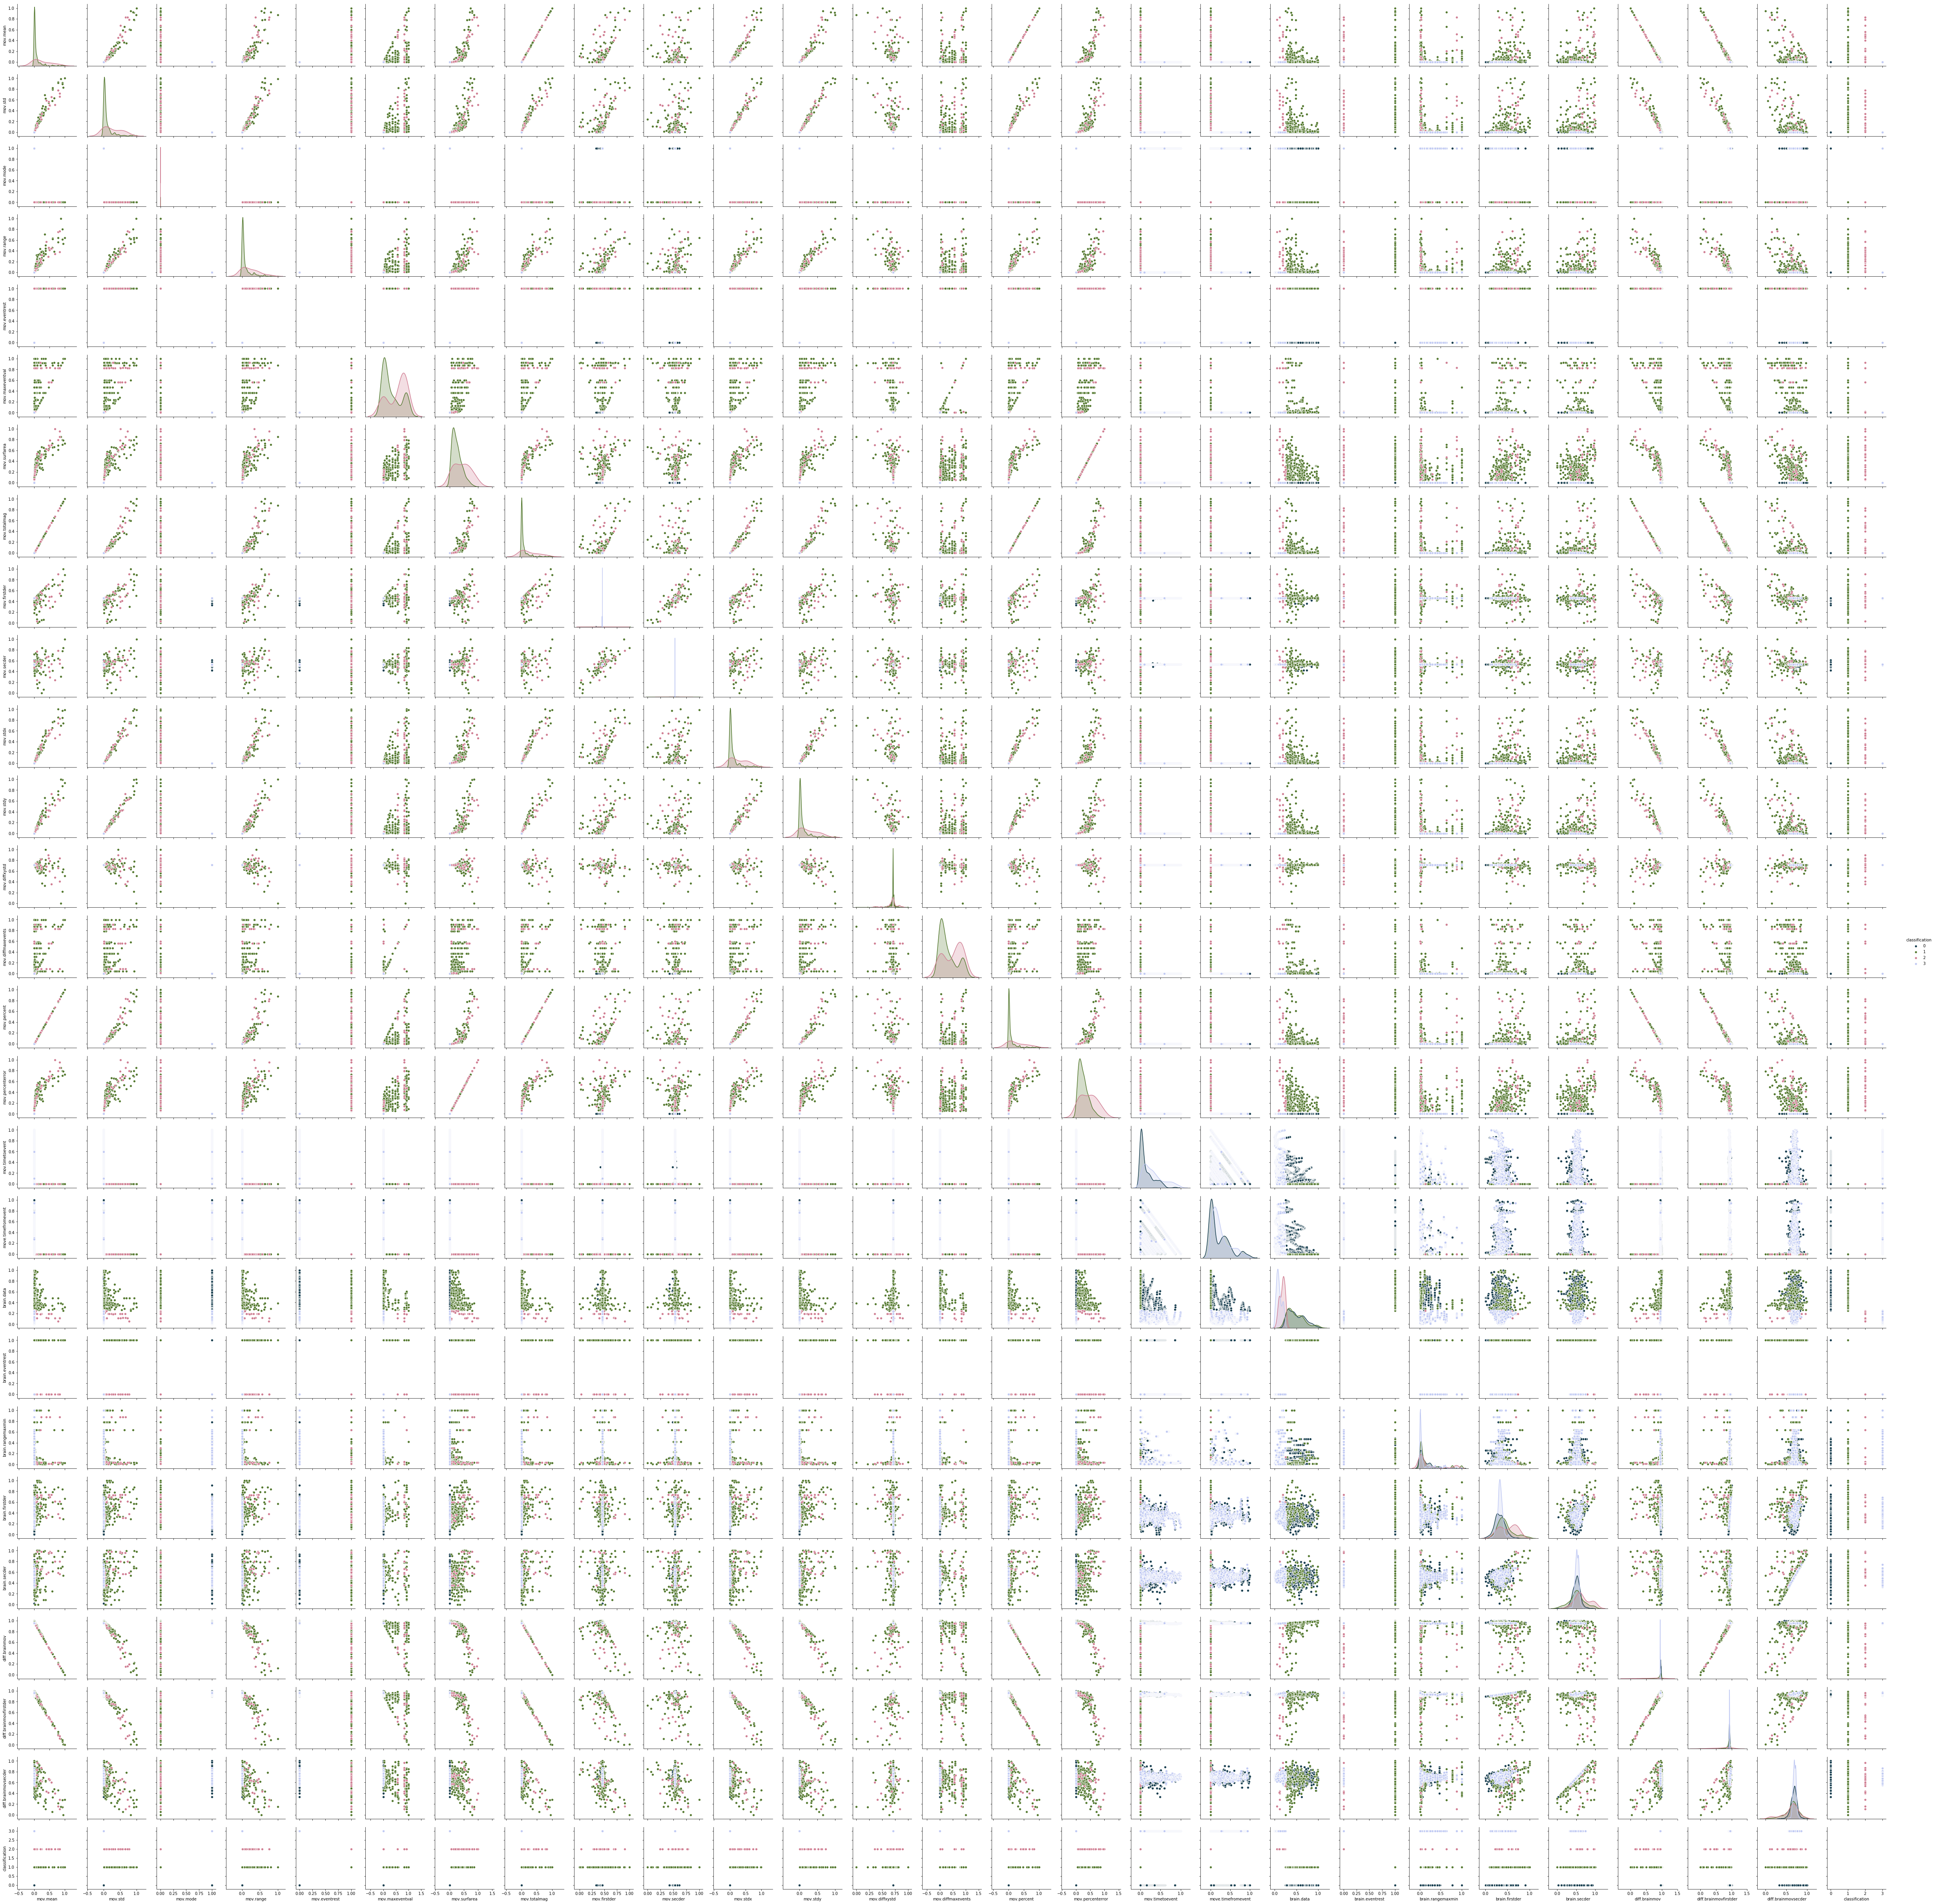

In [5]:
sns.pairplot(data, 
             diag_kind="kde", 
             markers=["o", "o", "o", "o"], 
             hue_order = [0, 1, 2, 3], hue='classification', palette = 'cubehelix')
plt.savefig('/Users/emmadionne/Documents/metrics_pairplot.png')

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
       ... 
3970    0.0
3971    0.0
3972    0.0
3973    0.0
3974    0.0
3975    0.0
3976    0.0
3977    0.0
3978    0.0
3979    0.0
3980    0.0
3981    0.0
3982    0.0
3983    0.0
3984    0.0
3985    0.0
3986    0.0
3987    0.0
3988    0.0
3989    0.0
3990    0.0
3991    0.0
3992    0.0
3993    0.0
3994    0.0
3995    0.0
3996    0.0
3997    0.0
3998    0.0
3999    0.0
Name: mov.mean, Length: 4000, dtype: float16


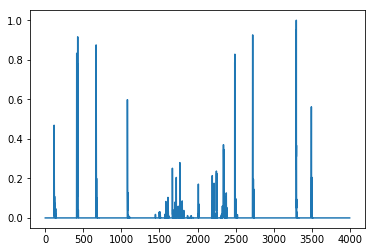

In [7]:
plt.plot(data["mov.mean"])

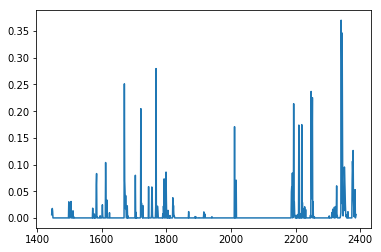

In [9]:
#1445-2387
plt.plot(data["mov.mean"][1445:2388])

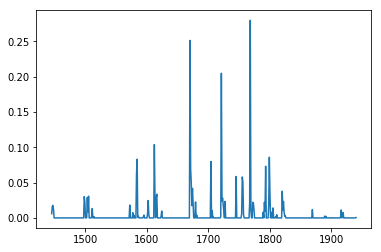

In [11]:
#1445-1941
plt.plot(data["mov.mean"][1445:1941])

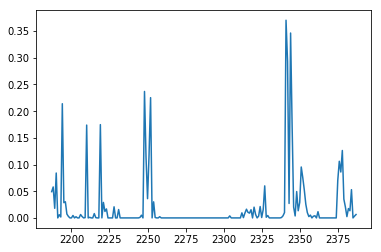

In [13]:
#2187-2387
plt.plot(data["mov.mean"][2187:2388])

In [ ]:
plt.plot(data["mov.mean"][1445:2388])
plt.plot(data["mov.mean"][0:1445], color = "orange")
plt.plot(data["mov.mean"][2388:], color = "orange")
indices = []
for i in range(len(data["mov.mean"])):
    if i >= 1445 and i < 2388:
        indices.append(1)
    else:
        indices.append(0)

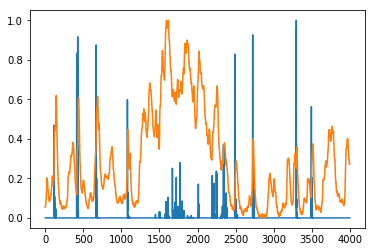

In [17]:
plt.plot(data["mov.mean"])
plt.plot(data["brain.data"])

1
1.0
1.0


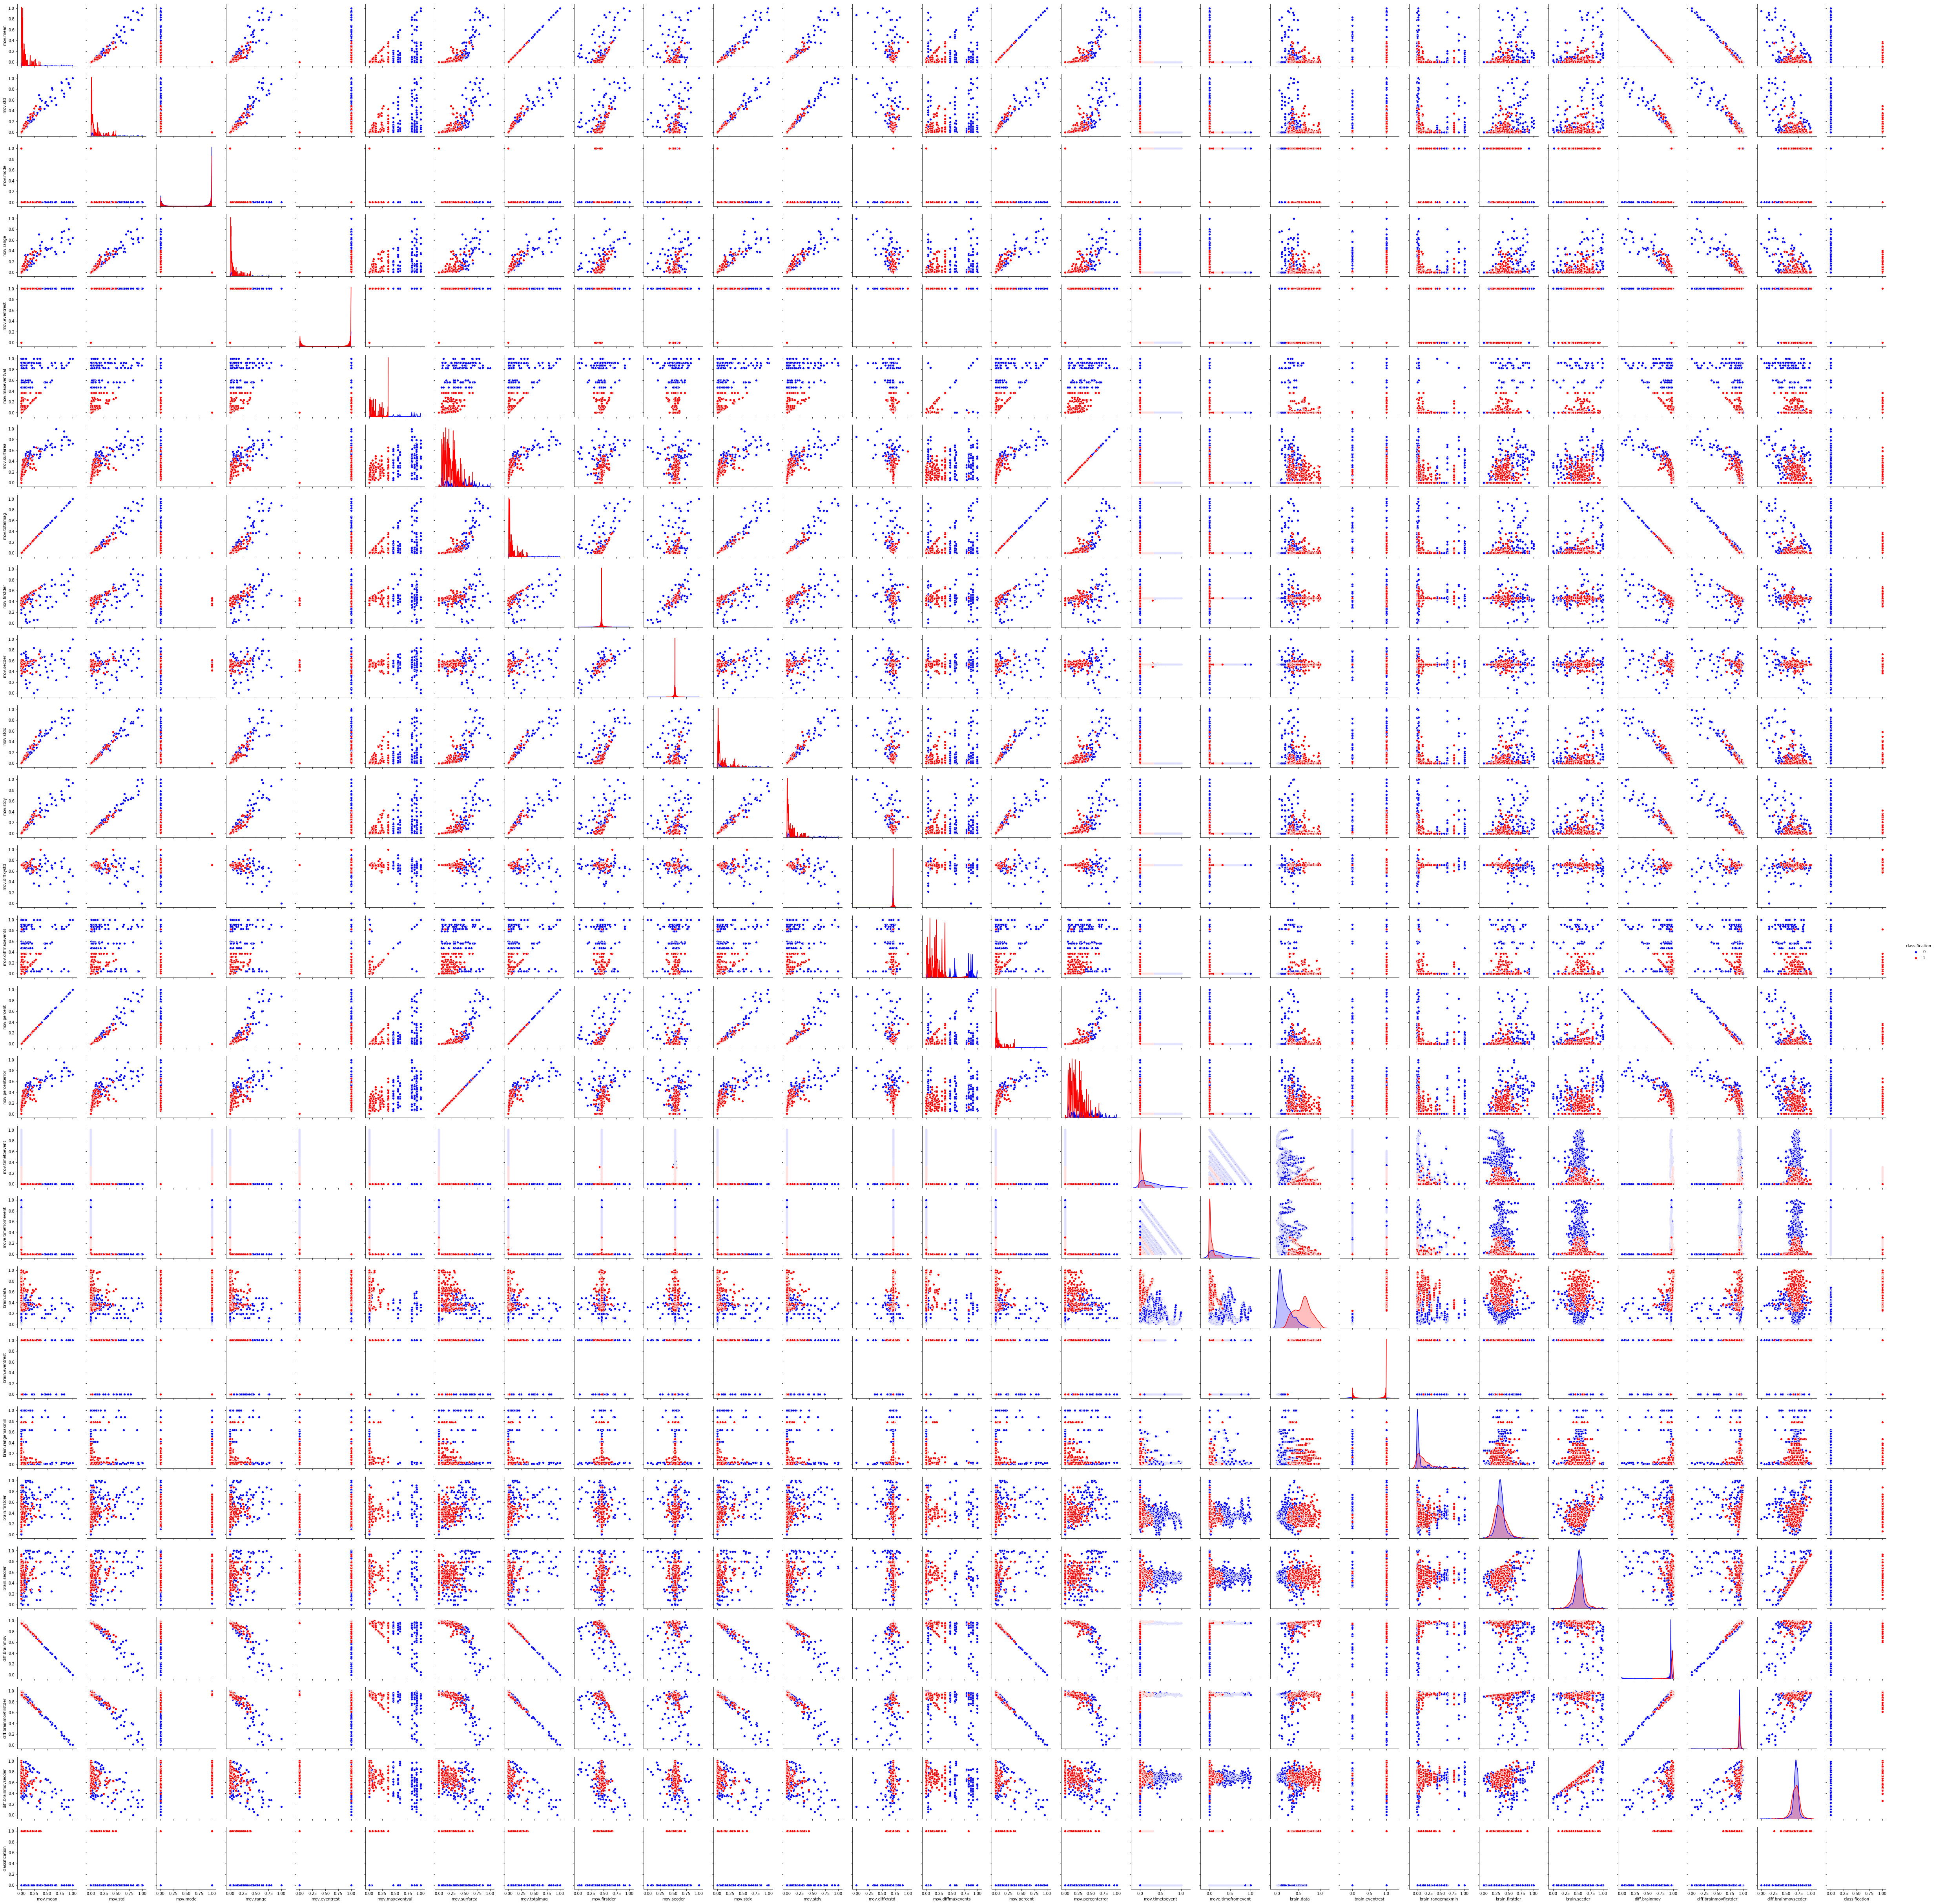

In [51]:
data = data.astype('float16')
a = np.zeros(len(data))
a[1445:2388]=1
data['classification'] = a
# data['classification'].iloc[indices == 0] = 0
# data['classification'].iloc[indices == 1] = 1
c = ["blue", "red"]
print(indices[1500])
print(data["classification"][1500])
print(data.loc[1500, "classification"])
sns.pairplot(data, 
             diag_kind="kde", 
             markers=["o", "o"], 
             hue_order = [0, 1], hue='classification', palette = c)
plt.savefig('/Users/emmadionne/Documents/metrics_small_pairplot.png')